In [1]:
from utils.json_utils import *

In [2]:
data = load_json("/home/guest-pjy/data/source/hotpot_easy_only.json")
new_data_path = "/home/guest-pjy/data/0830/hotpot_easy_only_preprocessed.json"

In [3]:
data[0]

{'supporting_facts': [['Global Fighting Championship', 1],
  ['Global Fighting Championship', 2],
  ['Badr Hari', 0],
  ['Badr Hari', 2]],
 'level': 'easy',
 'question': 'Who was once considered the best kick boxer in the world, however he has been involved in a number of controversies relating to his "unsportsmanlike conducts" in the sport and crimes of violence outside of the ring.',
 'context': [['Verano de Escándalo (1998)',
   ['The 1998 Verano de Escándalo (Spanish for "Summer of Scandal") was the second annual "Verano de Escandalo" professional wrestling show promoted by AAA.',
    ' The show took place on September 18, 1998, in Madero, Tamaulipas, Mexico.',
    ' The main event featured steel cage match between the teams of Heavy Metal and Blue Demon Jr. and Kick Boxer and Abismo Negro.',
    ' The stipulation of the main event was that if the team of Heavy Metal and Blue Demon Jr. lost referee Guicho Dominguez would be referee El Tirante\'s "slave" for a week.',
    " If Kick 

In [4]:
from collections import Counter

new_data = []
dd = Counter()
for _idx, item in enumerate(data):
    sup_facts = item["supporting_facts"]
    ctx_list = []
    cnt = 0
    for sf in sup_facts:
        title, idx = sf
        for context in item["context"]:

            if context[0] == title:
                if " ".join(context[1]) not in ctx_list:
                    ctx_list.append(" ".join(context[1]))
                cnt += 1
    if ctx_list != []:
        dd[cnt] += 1
        new_data.append(
            {
                "index": _idx,
                "question": item["question"],
                "answers": [item["answer"]],
                "ctxs": ctx_list,
            }
        )

In [5]:
new_data[0]

{'index': 0,
 'question': 'Who was once considered the best kick boxer in the world, however he has been involved in a number of controversies relating to his "unsportsmanlike conducts" in the sport and crimes of violence outside of the ring.',
 'answers': ['Badr Hari'],
 'ctxs': ['Global Fighting Championship (also known as GFC) was a UAE-based kickboxing and mixed martial arts (MMA) event.  Fighters from around world on the roster include Badr Hari, Peter Aerts, Peter Graham, Dewey Cooper, Zabit Samedov.  It was considered as one of the biggest kickboxing and MMA promotion in Middle East. <ref name="Emirates 24/7"> </ref>',
  'Badr Hari (Arabic: بدر هاري\u200e \u200e ; born 8 December 1984) is a Moroccan-Dutch super heavyweight kickboxer from Amsterdam, fighting out of Mike\'s Gym in Oostzaan.  He is a former K-1 Heavyweight champion (2007—2008), It\'s Showtime Heavyweight world champion (2009-2010) and "K-1 World Grand Prix 2009" finalist.  Hari has been a prominent figure in the wo

In [6]:
for item in new_data:
    print(item["answers"])

['Badr Hari']
['Super Bowl XLVIII']
['Hetfield and Ulrich, longtime lead guitarist Kirk Hammett, and bassist Robert Trujillo.']
['2017']
['Nevada']
['Kelli Ward']
['Carol Lawrence']
['New York City']
['Amy Jo Johnson']
['Australia']
['California']
['Roman Catholic']
['Dennis Howard Marks']
['Robert Sheehan']
['Sex and the City']
['England']
['Robert Zemeckis']
['South Park']
['Boston College']
['Victor John Mature']
['Canada']
['Keyshia Cole']
['Band of Brothers']
['Train to Busan']
['rock band']
['CEO of Lionsgate UK & Europe']
['Swoosie Kurtz']
['Great Britain']
['July 5, 1984']
['Turkey']
['300']
['2,586']
['English']
['Emrich "Imi" Lichtenfeld']
['Lord Black of Crossharbour']
['Hong Kong']
['Danny Manning']
['BUST']
['rock']
['Sarah Janet Maas']
['alternative rock virtual band Gorillaz']
['rock']
['Tsim Sha Tsui, Hong Kong']
['Massachusetts']
['beetle']
['Cataloochee']
['NBC 10']
['playwright']
['China']
['The Raconteurs']
['Cooking Light']
['Radiohead']
['opera']
['Lyudmila Stefan

In [7]:
save_json(new_data_path, new_data)

In [8]:
data = load_json(new_data_path)

In [9]:
cnt = dict()
for item in data:
    ctx = sum(len(ctx.split()) for ctx in item["ctxs"]) / len(item["ctxs"])
    l = ctx
    cnt[l] = cnt.get(l, 0) + 1
tuple_list = sorted(cnt.items(), key=lambda x: x[0])

In [10]:
print(tuple_list)

[(10.0, 1), (11.5, 2), (12.0, 1), (12.5, 1), (13.0, 2), (13.5, 3), (14.0, 8), (14.5, 3), (15.0, 4), (15.5, 2), (16.0, 6), (16.5, 4), (17.0, 7), (17.5, 15), (18.0, 5), (18.5, 17), (19.0, 14), (19.5, 12), (20.0, 26), (20.5, 24), (21.0, 18), (21.5, 13), (22.0, 16), (22.5, 32), (23.0, 29), (23.5, 38), (24.0, 23), (24.5, 26), (25.0, 27), (25.5, 39), (26.0, 34), (26.5, 37), (27.0, 28), (27.5, 44), (28.0, 39), (28.5, 47), (29.0, 46), (29.5, 57), (30.0, 51), (30.5, 62), (31.0, 54), (31.5, 49), (32.0, 66), (32.5, 74), (33.0, 59), (33.5, 73), (34.0, 72), (34.5, 70), (35.0, 78), (35.5, 75), (36.0, 77), (36.5, 69), (37.0, 67), (37.5, 86), (38.0, 81), (38.5, 83), (39.0, 94), (39.5, 102), (40.0, 98), (40.5, 106), (41.0, 97), (41.5, 108), (42.0, 94), (42.5, 108), (43.0, 92), (43.5, 104), (44.0, 111), (44.5, 121), (45.0, 114), (45.5, 117), (46.0, 116), (46.5, 131), (47.0, 142), (47.5, 114), (48.0, 131), (48.5, 114), (49.0, 111), (49.5, 139), (50.0, 112), (50.5, 125), (51.0, 113), (51.5, 138), (52.0, 1

<BarContainer object of 357 artists>

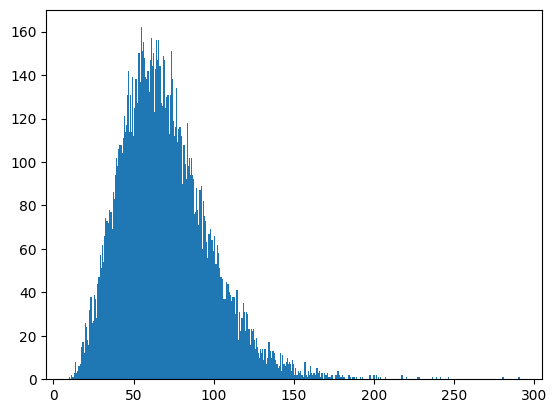

In [11]:
import matplotlib.pyplot as plt

plt.bar([x[0] for x in tuple_list], [x[1] for x in tuple_list])

In [12]:
# calculate the mean and std from tuple_list
import numpy as np

# Extracting word lengths and counts
word_lengths = np.array([x[0] for x in tuple_list])
counts = np.array([x[1] for x in tuple_list])

# Calculate the mean
mean = np.sum(word_lengths * counts) / np.sum(counts)

# Calculate the variance
variance = np.sum(counts * (word_lengths - mean) ** 2) / np.sum(counts)

# Standard deviation is the square root of the variance
std = np.sqrt(variance)

mean, std

(69.59431337636323, 27.53458828686266)

In [13]:
type(mean + std)

numpy.float64

In [14]:
cnt = 0
new_data = []
for item in data:
    ctx = sum(len(ctx.split()) for ctx in item["ctxs"]) / len(item["ctxs"])
    ctx = np.round(ctx, 2)
    if (ctx <= (mean + 0.21 * std).round(2)) and (
        ctx >= (mean - 0.21 * std).round(2)
    ):
        cnt += 1
        new_data.append(item)
print(cnt)

3056


In [15]:
for idx, item in enumerate(new_data):
    item["index"] = idx

In [16]:
new_data

[{'index': 0,
  'question': 'Who was once considered the best kick boxer in the world, however he has been involved in a number of controversies relating to his "unsportsmanlike conducts" in the sport and crimes of violence outside of the ring.',
  'answers': ['Badr Hari'],
  'ctxs': ['Global Fighting Championship (also known as GFC) was a UAE-based kickboxing and mixed martial arts (MMA) event.  Fighters from around world on the roster include Badr Hari, Peter Aerts, Peter Graham, Dewey Cooper, Zabit Samedov.  It was considered as one of the biggest kickboxing and MMA promotion in Middle East. <ref name="Emirates 24/7"> </ref>',
   'Badr Hari (Arabic: بدر هاري\u200e \u200e ; born 8 December 1984) is a Moroccan-Dutch super heavyweight kickboxer from Amsterdam, fighting out of Mike\'s Gym in Oostzaan.  He is a former K-1 Heavyweight champion (2007—2008), It\'s Showtime Heavyweight world champion (2009-2010) and "K-1 World Grand Prix 2009" finalist.  Hari has been a prominent figure in t

In [17]:
cnt = dict()
for item in new_data:
    ctx = item["ctxs"][0]
    l = len(ctx.split())
    cnt[l] = cnt.get(l, 0) + 1
tuple_list = sorted(cnt.items(), key=lambda x: x[0])

<BarContainer object of 125 artists>

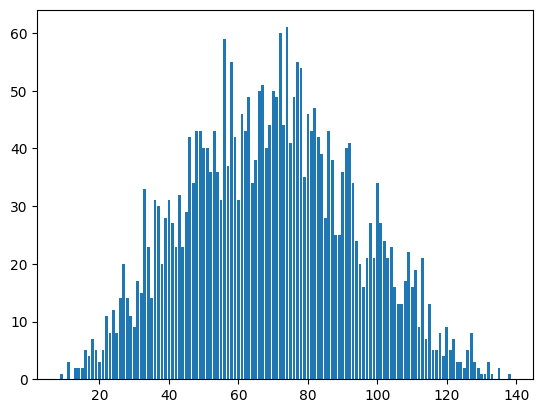

In [18]:
import matplotlib.pyplot as plt

plt.bar([x[0] for x in tuple_list], [x[1] for x in tuple_list])

In [19]:
# calculate the mean and std from tuple_list
import numpy as np

# Extracting word lengths and counts
word_lengths = np.array([x[0] for x in tuple_list])
counts = np.array([x[1] for x in tuple_list])

# Calculate the mean
mean = np.sum(word_lengths * counts) / np.sum(counts)

# Calculate the variance
variance = np.sum(counts * (word_lengths - mean) ** 2) / np.sum(counts)

# Standard deviation is the square root of the variance
std = np.sqrt(variance)

mean, std

(69.3455497382199, 24.023556144515283)

In [20]:
from utils.json_utils import *

In [ ]:
data = load_json("/home/guest-pjy/data/0830/hotpot_para_cleaned.json")

FileNotFoundError: [Errno 2] No such file or directory: 'home/guest-pjy/data/0830/hotpot_para_cleaned.json'

In [3]:
from utils.json_utils import *

data = load_json("/home/guest-pjy/data/pipeline/hotpot_train_v1.1.json")[:50]
save_json("/home/guest-pjy/data/pipeline/hotpot_sample.json", data)